In [6]:
##Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.
import tensorflow as tf
from tensorflow import keras
##print("tenserflow latest version:",tf.__version__)
##print("keras latest version:",tf.keras.__version__)

In [11]:
# Q2. Load the Wine Quality dataset and explore its dimensions.
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')
print("Dataset dimensions:", data.shape)

Dataset dimensions: (1599, 12)


In [43]:
##Q3. Check for null values, identify categorical variables, and encode them.
print("Null Values:", data.isnull().sum())
# Check the column names in your DataFrame
print(data.columns)

# If there is a column similar to 'type', use that name
# For example, if the column is named 'wine_type'
categorical_vars = ['density']
data[categorical_vars] = data[categorical_vars].astype('category')
data[categorical_vars] = data[categorical_vars].apply(lambda x: x.cat.codes)

Null Values: fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [44]:
##Q4. Separate the features and target variables from the dataframe.
X = data.drop('quality',axis = 1)
y = data['quality']

In [45]:
# Q5. Perform a train-test split and divide the data into training, validation, and test datasets.
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [46]:
##Q6 Perform scaling on the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [47]:
##Q7. Create at least 2 hidden layers and an output layer for the binary categorical variables.
##Q8 Create a Sequential model and add all the layers to it.
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [48]:
##Q9. Implement a TensorBoard callback to visualize and monitor the model's training process.
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='./logs',histogram_freq = 1)
tensorboard_callback

In [49]:
## Q10  Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if
##no improvement is observed.
early_stopping_callback =  tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5)

In [50]:
##Q11. Implement a ModelCheckpoint callback to save the best model based on a chosen metric during
##training.
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint('best_model.h5',monitor = 'val_loss', save_best_only=True)

In [51]:
##Print model summary
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                768       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [52]:
##Q13. Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'].
##Q14. Compile the model with the specified loss function, optimizer, and metrics.
model.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

In [53]:
##Q15. Fit the model to the data, incorporating the TensorBoard, Early Stopping, and ModelCheckpoint
##callbacks.
history = model.fit(X_train, y_train, epochs =50, validation_data=(X_val, y_val),
                    callbacks=[tensorboard_callback,early_stopping_callback, model_checkpoint_callback])

Epoch 1/50
30/30 [==============================] - 1s 12ms/step - loss: -1.7662 - accuracy: 0.0302 - val_loss: -4.1450 - val_accuracy: 0.0312
Epoch 2/50
23/30 [======================>.......] - ETA: 0s - loss: -5.9343 - accuracy: 0.0326    

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


30/30 [==============================] - 0s 6ms/step - loss: -6.8948 - accuracy: 0.0302 - val_loss: -11.0482 - val_accuracy: 0.0312
Epoch 3/50
30/30 [==============================] - 0s 7ms/step - loss: -16.7746 - accuracy: 0.0302 - val_loss: -25.2780 - val_accuracy: 0.0312
Epoch 4/50
30/30 [==============================] - 0s 7ms/step - loss: -36.5310 - accuracy: 0.0302 - val_loss: -53.0751 - val_accuracy: 0.0312
Epoch 5/50
30/30 [==============================] - 0s 6ms/step - loss: -72.8253 - accuracy: 0.0302 - val_loss: -102.2072 - val_accuracy: 0.0312
Epoch 6/50
30/30 [==============================] - 0s 8ms/step - loss: -131.2531 - accuracy: 0.0302 - val_loss: -179.8718 - val_accuracy: 0.0312
Epoch 7/50
30/30 [==============================] - 0s 7ms/step - loss: -223.0256 - accuracy: 0.0302 - val_loss: -289.8688 - val_accuracy: 0.0312
Epoch 8/50
30/30 [==============================] - 0s 8ms/step - loss: -350.4446 - accuracy: 0.0302 - val_loss: -446.7497 - val_accuracy: 0.03

In [54]:
## get the models parameters
model_params = model.get_weights()
print(model_params)

[array([[-2.1206765 ,  2.5305924 , -2.726849  , -2.6883893 ,  2.6596377 ,
         2.3841898 , -2.5686445 ,  2.4316278 , -2.393319  ,  1.2885325 ,
         2.2792044 ,  2.2998    ,  2.4657362 ,  2.0310464 , -2.5026531 ,
         2.137361  ,  2.410325  , -2.8323326 , -2.7707565 ,  2.516     ,
         2.6523569 , -2.6132922 ,  2.6535313 ,  2.2406278 ,  2.5339313 ,
         2.7233264 ,  2.4997988 , -2.4946206 , -2.7222176 , -2.6426044 ,
        -2.3292122 , -2.7481334 ,  2.6997557 , -2.5238032 ,  2.3168795 ,
        -2.6831713 ,  2.5865815 ,  2.7095056 , -1.980131  , -2.5601761 ,
         1.8391417 , -2.406171  , -2.4272053 ,  2.2884572 ,  2.429205  ,
         2.1713536 ,  2.4960423 ,  2.3078873 , -1.8766603 , -2.6758606 ,
         2.7817657 ,  2.6098728 ,  2.558883  ,  2.148113  ,  2.7559912 ,
         2.5146468 ,  2.6612995 , -1.8904498 ,  2.4440079 , -2.812935  ,
        -2.6573098 , -2.8429332 , -2.8481119 ,  1.9672912 ],
       [-2.0622885 , -2.6298664 ,  0.6239034 , -1.3096992 , -2

In [55]:
# Q17. Store the model's training history as a Pandas DataFrame.
history_df = pd.DataFrame(history.history)
print("Training history:", history_df)

Training history:              loss  accuracy       val_loss  val_accuracy
0       -1.766183   0.03024      -4.145004       0.03125
1       -6.894849   0.03024     -11.048182       0.03125
2      -16.774637   0.03024     -25.277969       0.03125
3      -36.530956   0.03024     -53.075073       0.03125
4      -72.825317   0.03024    -102.207199       0.03125
5     -131.253098   0.03024    -179.871796       0.03125
6     -223.025558   0.03024    -289.868835       0.03125
7     -350.444611   0.03024    -446.749664       0.03125
8     -524.596436   0.03024    -654.111389       0.03125
9     -753.910156   0.03024    -917.547058       0.03125
10   -1040.113159   0.03024   -1251.930908       0.03125
11   -1397.196411   0.03024   -1657.632080       0.03125
12   -1829.353149   0.03024   -2139.677246       0.03125
13   -2337.054199   0.03024   -2718.101074       0.03125
14   -2936.851318   0.03024   -3382.298096       0.03125
15   -3624.570557   0.03024   -4146.561523       0.03125
16   -4407.90

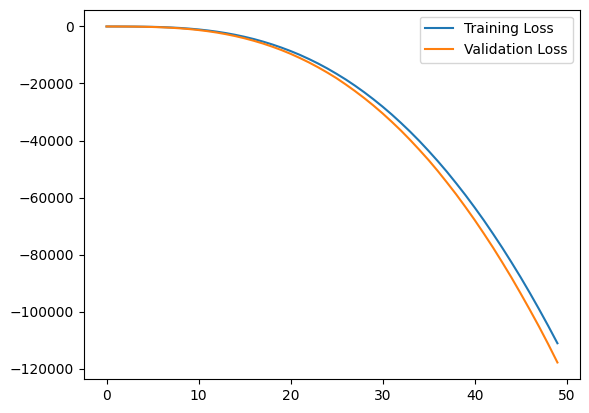

In [56]:
 ##Q18. Plot the model's training history.
import matplotlib.pyplot as plt
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [57]:
# Q19. Evaluate the model's performance using the test data.
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

10/10 [==============================] - 0s 2ms/step - loss: -96763.8516 - accuracy: 0.0437 
Test accuracy: 0.04374999925494194
